<a href="https://colab.research.google.com/github/Diandra2607/Unilever/blob/main/Unilever.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_excel('/content/Supply Chain Analytics Uniliver.xlsx')

In [ ]:
data

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Supplier name,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Supplier 3,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Supplier 3,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Supplier 1,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Supplier 5,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Supplier 1,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Supplier 4,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Supplier 3,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Supplier 4,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Supplier 5,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [ ]:
data.dtypes

,0
Product type,object
SKU,object
Price,float64
Availability,int64
Number of products sold,int64
Revenue generated,float64
Customer demographics,object
Stock levels,int64
Lead times,int64
Order quantities,int64


Descriptive Statistics:
            Price  Availability  Stock levels  Lead times  Order quantities  \
count  100.000000    100.000000    100.000000  100.000000        100.000000   
mean    49.462461     48.400000     47.770000   15.960000         49.220000   
std     31.168193     30.743317     31.369372    8.785801         26.784429   
min      1.699976      1.000000      0.000000    1.000000          1.000000   
25%     19.597823     22.750000     16.750000    8.000000         26.000000   
50%     51.239831     43.500000     47.500000   17.000000         52.000000   
75%     77.198228     75.000000     73.000000   24.000000         71.250000   
max     99.171329    100.000000    100.000000   30.000000         96.000000   

       Revenue generated  
count         100.000000  
mean         5776.048187  
std          2732.841744  
min          1061.618523  
25%          2812.847151  
50%          6006.352023  
75%          8253.976921  
max          9866.465458  


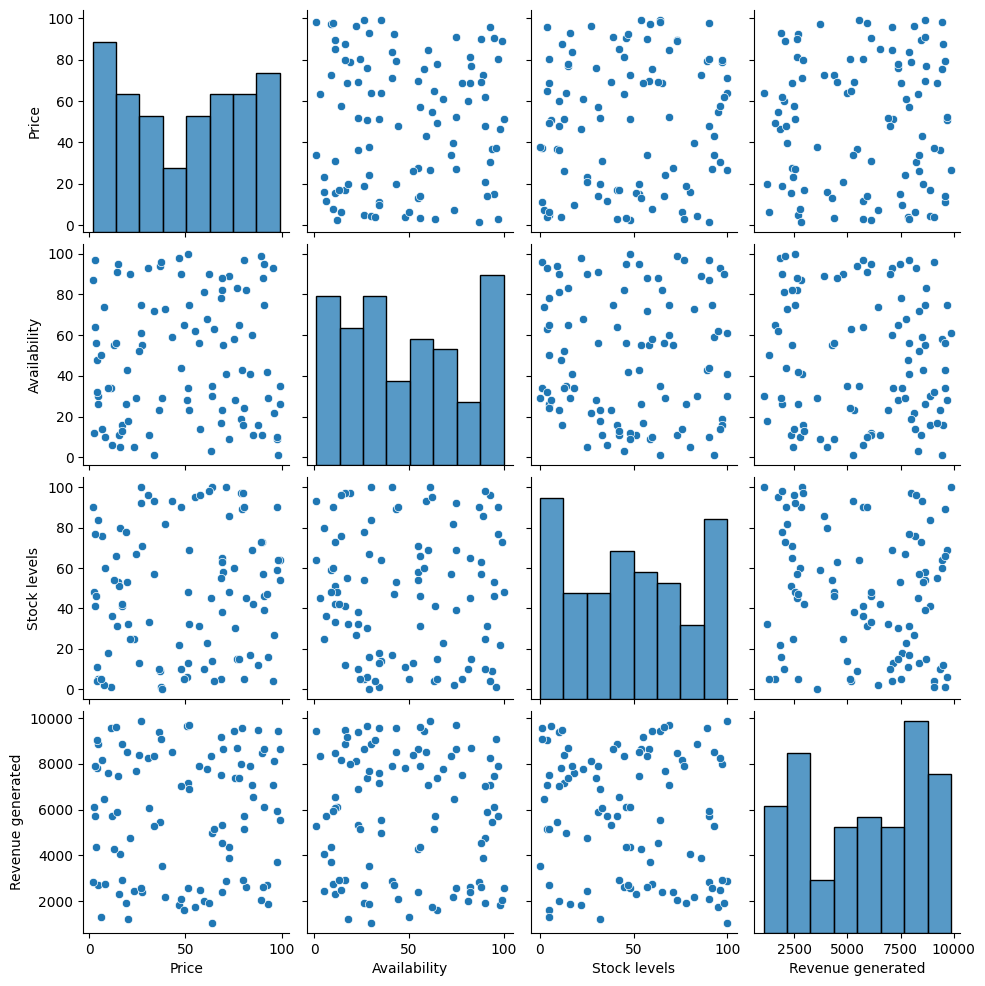

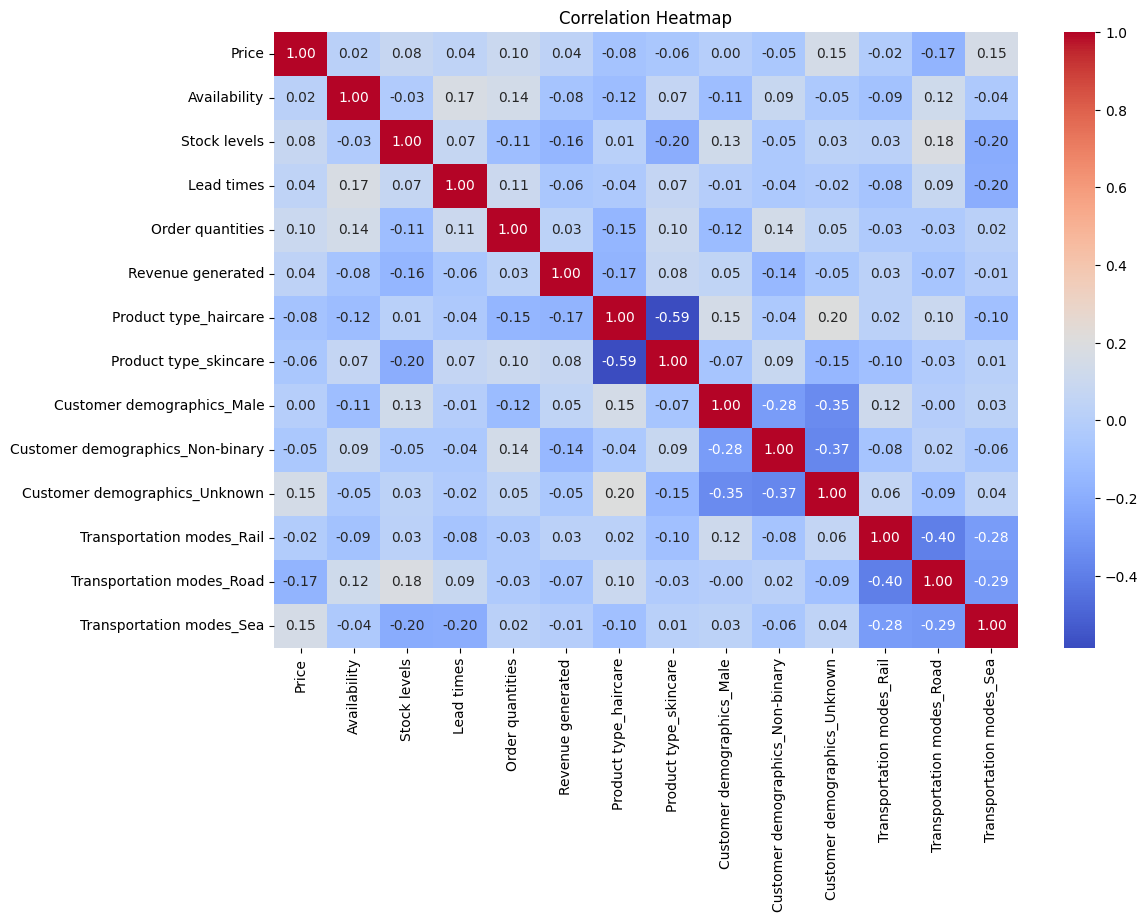

Regression Results:
                            OLS Regression Results                            
Dep. Variable:      Revenue generated   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.8050
Date:                Fri, 24 Jan 2025   Prob (F-statistic):              0.653
Time:                        08:54:50   Log-Likelihood:                -926.96
No. Observations:                 100   AIC:                             1882.
Df Residuals:                      86   BIC:                             1918.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5776.0482    276.852

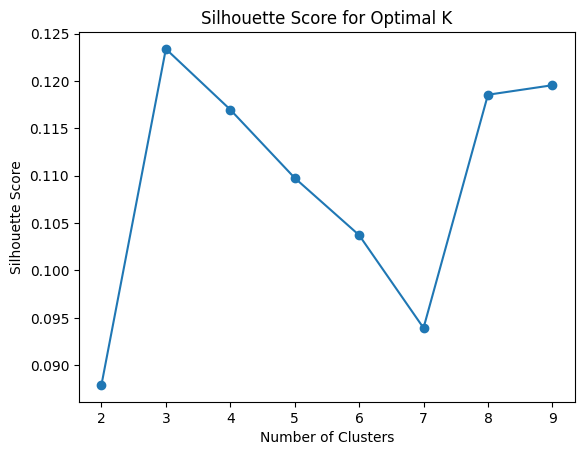

Segment Analysis:
             Price  Availability  Stock levels  Lead times  Order quantities  \
Segment                                                                        
0        59.858611     46.000000     33.823529   12.176471         50.176471   
1        50.611586     45.981481     47.370370   16.518519         49.685185   
2        41.228418     54.310345     56.689655   17.137931         47.793103   

         Revenue generated  Product type_haircare  Product type_skincare  \
Segment                                                                    
0              5739.048187               0.235294               0.411765   
1              5939.366061               0.333333               0.407407   
2              5493.628698               0.413793               0.379310   

         Customer demographics_Male  Customer demographics_Non-binary  \
Segment                                                                 
0                          0.235294                   

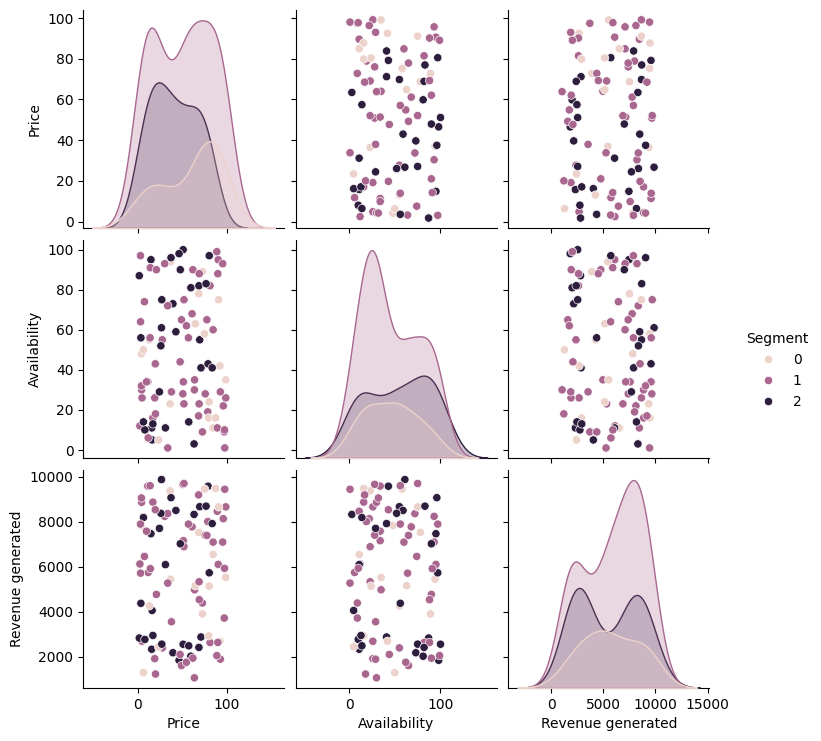

In [ ]:
# 2. Data Preprocessing
# Handle missing values
data = data.dropna()

# Create dummy variables for categorical data
categorical_columns = ['Product type', 'Customer demographics', 'Transportation modes']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Select relevant columns for analysis
relevant_columns = ['Price', 'Availability', 'Stock levels', 'Lead times',
                    'Order quantities', 'Revenue generated'] + [col for col in data.columns if 'Product type_' in col or 'Customer demographics_' in col or 'Transportation modes_' in col]
data = data[relevant_columns]

# Define independent (X) and dependent (Y) variables
X = data.drop(columns=['Revenue generated'])
Y = data['Revenue generated']

# Standardize numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

# 4. Data Visualization
sns.pairplot(data[['Price', 'Availability', 'Stock levels', 'Revenue generated']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 5. Multiple Linear Regression
X_const = sm.add_constant(X_scaled)  # Add intercept
model = sm.OLS(Y, X_const).fit()
print("Regression Results:")
print(model.summary())

# 6. Partial Regression Coefficients (T-Test)
print("T-Test Results:")
print(model.t_test(np.eye(len(model.params))))

# 7. Market Segmentation using Clustering
# Determine optimal number of clusters using Silhouette Score
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Fit KMeans with optimal K (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(X_scaled)

# Analyze segments
grouped = data.groupby('Segment').mean()
print("Segment Analysis:")
print(grouped)

# Visualize segments
sns.pairplot(data, hue='Segment', vars=['Price', 'Availability', 'Revenue generated'])
plt.show()
